In [1]:
import numpy as np

In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

In [3]:
import matplotlib.pyplot as plt

In [4]:
from cpmix_utils import weight_fun, calc_weights, calc_min_distances, calculate_metrics

In [5]:
calc_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_calc_popts.npy')

In [6]:
pred_popts = np.load('../monit_npy/nn_rhorho_Variant-All_Unweighted_False_NO_NUM_CLASSES_21/regression_preds_popts.npy')

In [7]:
calc_popts.shape

(100000, 3)

In [8]:
def calculate_classes_weights(num_classes, popts):
    classes = np.linspace(0, 2, num_classes) * np.pi
    data_len = popts.shape[0]
    return calc_weights(classes, popts, data_len, num_classes)

In [9]:
metrics = [calculate_metrics(i+2, calculate_classes_weights(i+2, calc_popts), calculate_classes_weights(i+2, pred_popts)) for i in range(49)]

In [10]:
metrics = np.stack(metrics)

In [169]:
np.save( 'metrics_popts.npy', metrics,)

# Accuracy

Text(0,0.5,'Accuracy')

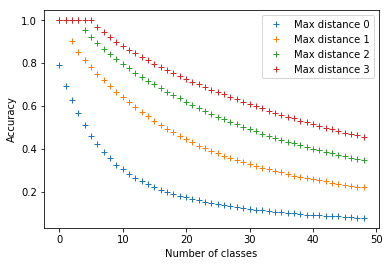

In [11]:
plt.plot(metrics[:, 0],'+', label='Max distance 0')
plt.plot(metrics[:, 1],'+', label='Max distance 1')
plt.plot(metrics[:, 2],'+', label='Max distance 2')
plt.plot(metrics[:, 3],'+', label='Max distance 3')
plt.legend(loc='upper right')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')


# L1 Distance

Text(0,0.5,'l1')

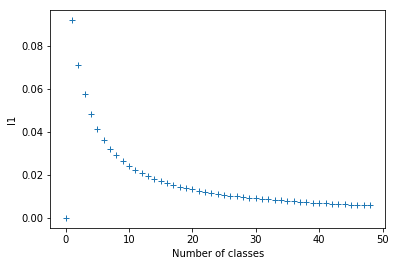

In [12]:
plt.plot(metrics[:, 5], '+')
plt.xlabel("Number of classes")
plt.ylabel('l1')

# L2 distance

Text(0,0.5,'l2')

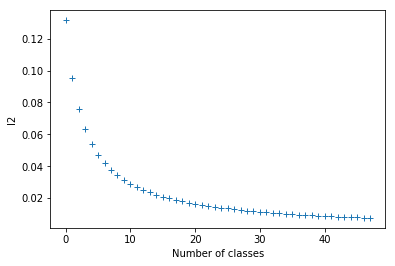

In [13]:
plt.plot(metrics[1:, 6], '+')
plt.xlabel("Number of classes")
plt.ylabel('l2')

In [14]:
def plot_distr(num_class, calc_popts, pred_popts):

    calc_w = calculate_classes_weights(num_class, calc_popts)
    preds_w = calculate_classes_weights(num_class, pred_popts)
    pred_arg_maxs = np.argmax(preds_w, axis=1)
    calc_arg_maxs = np.argmax(calc_w, axis=1)
    
    min_distances = calc_min_distances(pred_arg_maxs, calc_arg_maxs, num_class-1)
    
    bins = list(range(int(np.min(min_distances)), int(np.max(min_distances)+2)))
    plt.hist(min_distances, bins=bins, histtype='step')
    plt.xlabel('Prediction error distance')
    

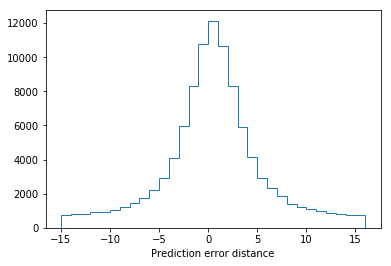

In [15]:
i = 32
plot_distr(i, calc_popts, pred_popts)

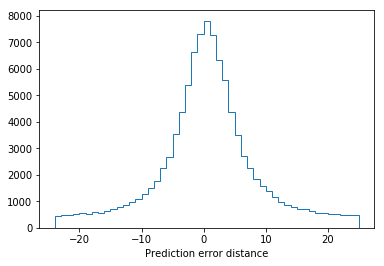

In [16]:
i = 50
plot_distr(i, calc_popts, pred_popts)

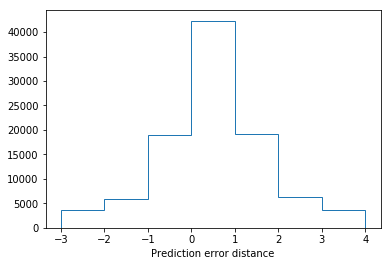

In [17]:
i = 8
plot_distr(i, calc_popts, pred_popts)

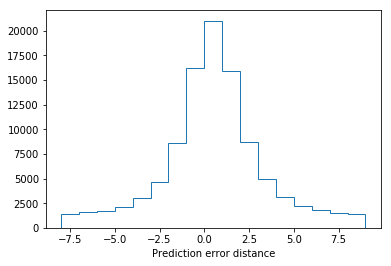

In [18]:
i = 18
plot_distr(i, calc_popts, pred_popts)

# plots

## Comment:
It may look like that "calc_popts" and "pred_popts" have different relative normalisation. But it is not true. Calc_popts and pred_popts are not normalized anywhere.

In [19]:
xs = np.linspace(0, 2*np.pi, 100)

Text(0.5,0,'Mixing angle')

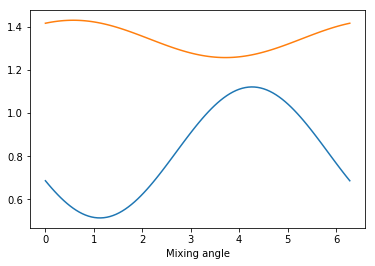

In [20]:
i=100
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

Text(0.5,0,'Mixing angle')

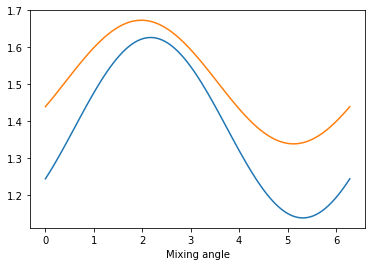

In [21]:
i=200
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

Text(0.5,0,'Mixing angle')

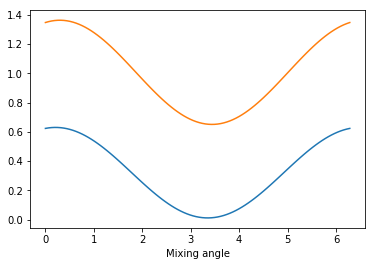

In [22]:
i=300
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

Text(0.5,0,'Mixing angle')

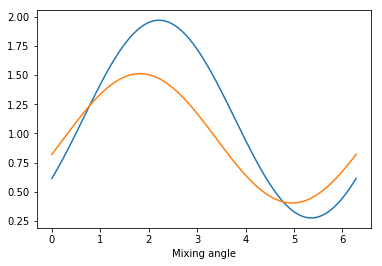

In [23]:
i=400
plt.plot(xs, weight_fun(xs, *calc_popts[i]))
plt.plot(xs, weight_fun(xs, *pred_popts[i]))
plt.xlabel("Mixing angle")

# Distance between maximums

In [24]:
from scipy.optimize import fminbound

In [25]:
fminbound(lambda x: -weight_fun(x, *calc_popts[400]), x1=0, x2=2*np.pi)

2.2139767136732376

In [26]:
max_calc = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in calc_popts])

In [27]:
max_pred = np.array([fminbound(lambda x: -weight_fun(x, *popt), x1=0, x2=2*np.pi) for popt in pred_popts])

In [28]:
min_distances = np.zeros(len(max_calc))
for i in range(len(max_calc)):
    dist = max_pred[i] - max_calc[i]
    if np.abs(2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = 2*np.pi + max_pred[i] - max_calc[i]
    if np.abs(-2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = -2*np.pi + max_pred[i] - max_calc[i]
    min_distances[i]  = dist

In [29]:
np.mean(np.abs(max_calc-max_pred))

1.18067735341287

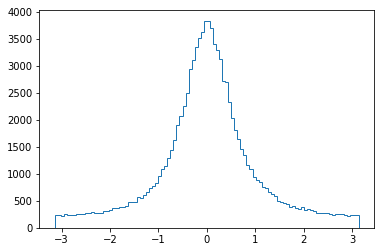

In [30]:
a=plt.hist(min_distances,histtype='step', bins=100)

# Distance between maximums - calculated using other method - for comparison

In [7]:
from cpmix_utils import calc_arg_maxs

In [8]:
max_calc = calc_arg_maxs(calc_popts, calc_popts.shape[0])

In [9]:
calc_popts.shape

(100000, 3)

In [11]:
max_pred = calc_arg_maxs(pred_popts, pred_popts.shape[0])

In [12]:
min_distances = np.zeros(len(max_calc))
for i in range(len(max_calc)):
    dist = max_pred[i] - max_calc[i]
    if np.abs(2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = 2*np.pi + max_pred[i] - max_calc[i]
    if np.abs(-2*np.pi + max_pred[i] - max_calc[i])<np.abs(dist):
        dist = -2*np.pi + max_pred[i] - max_calc[i]
    min_distances[i]  = dist

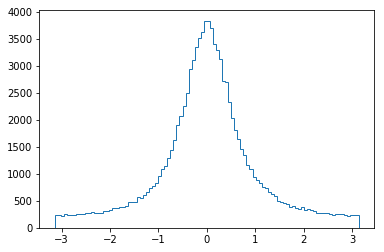

In [13]:
h =plt.hist(min_distances,histtype='step', bins=100)

# Find peak and its half-width 

In [14]:
y, bins, _ = h

In [15]:
bins.shape


(101,)

In [16]:
y.shape

(100,)

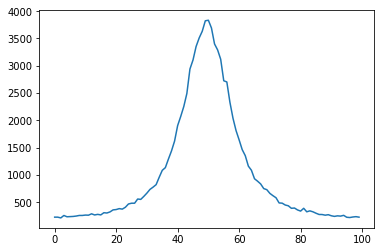

In [17]:
plt.plot(y)

In [18]:
from scipy.signal import find_peaks

In [19]:
peak_bin, info =  find_peaks(y, width=5, rel_height=0.5)

In [20]:
alpha = bins[1]-bins[0] # bins width is constant

In [21]:
width = alpha*info['widths'][0] # measured at half the prominence height; in radians units

In [22]:

print("Peak is in range: ", bins[peak_bin[0]], bins[peak_bin[0]+1])
print("Peak half-width is: ", width) 

Peak is in range:  -0.00029544382955126736 0.06252920243156534
Peak half-width is:  1.088219192545106


In [23]:
info

{'prominences': array([3611.]),
 'left_bases': array([2]),
 'right_bases': array([96]),
 'widths': array([17.32153315]),
 'width_heights': array([2028.5]),
 'left_ips': array([40.73353293]),
 'right_ips': array([58.05506608])}

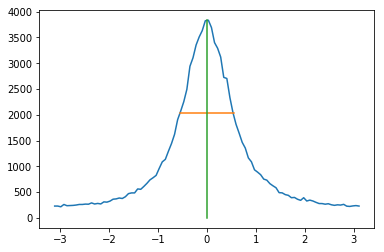

In [24]:
peak_middle = (bins[peak_bin[0]] +  bins[peak_bin[0]+1])/2*alpha

plt.plot(bins[:-1]+alpha/2, y)
plt.plot([peak_middle-width/2, peak_middle+width/2], [info['width_heights'][0], info['width_heights'][0]]) # half width line
plt.plot([peak_middle, peak_middle], [0, max(y)])